In [4]:
import pandas as pd
import numpy as np

pre_path = r"C:\Users\zyh\Desktop\李宏毅机器学习ppt\lhy_DL_Hw-master/"
train_path = pre_path + "train.csv"
test_path = pre_path + "test.csv"


df = pd.read_csv(train_path ,encoding = 'big5', engine = 'python')


display(df.head(50))

#第一步检查缺失值：
def check_is_null(df):  #传入df，不存在缺失值，则不返回，否则返回存在缺失值的列编号list
    
    mark_isnull = df.isnull().any()
    col_isnull_list = []
    for i,m in enumerate(mark_isnull):
        if(m):
            print("存在缺失值的列号为",i)
            col_isnull_list.append(i)

    if(len(col_isnull_list)==0):
        print("不存在缺失值")
    else:
        return col_isnull_list

check_is_null(df)


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


不存在缺失值


In [5]:
#第二步，异常值的转换
df.iloc[:,3:].replace("NR",0, inplace = True)
df

C:\Users\zyh\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [6]:
type_names = df.iloc[:,2].unique()
type_names

array(['AMB_TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10',
       'PM2.5', 'RAINFALL', 'RH', 'SO2', 'THC', 'WD_HR', 'WIND_DIREC',
       'WIND_SPEED', 'WS_HR'], dtype=object)

In [7]:
df.columns.values.tolist()

['日期',
 '測站',
 '測項',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [8]:
#第三步，拆分x和y


In [9]:
df.head(20)

,日期,測站,測項,0,1,2,3,4,5,6,...,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,豐原,AMB_TEMP,14,14,14,13,12,12,12,...,22,22,21,19,17,16,15,15,15,15
1,2014/1/1,豐原,CH4,1.8,1.8,1.8,1.8,1.8,1.8,1.8,...,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8
2,2014/1/1,豐原,CO,0.51,0.41,0.39,0.37,0.35,0.3,0.37,...,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,豐原,NMHC,0.2,0.15,0.13,0.12,0.11,0.06,0.1,...,0.1,0.13,0.14,0.23,0.18,0.12,0.1,0.09,0.1,0.08
4,2014/1/1,豐原,NO,0.9,0.6,0.5,1.7,1.8,1.5,1.9,...,2.5,2.2,2.5,2.3,2.1,1.9,1.5,1.6,1.8,1.5
5,2014/1/1,豐原,NO2,16,9.2,8.2,6.9,6.8,3.8,6.9,...,11,11,22,28,19,12,8.1,7,6.9,6
6,2014/1/1,豐原,NOx,17,9.8,8.7,8.6,8.5,5.3,8.8,...,14,13,25,30,21,13,9.7,8.6,8.7,7.5
7,2014/1/1,豐原,O3,16,30,27,23,24,28,24,...,65,64,51,34,33,34,37,38,38,36
8,2014/1/1,豐原,PM10,56,50,48,35,25,12,4,...,52,51,66,85,85,63,46,36,42,42
9,2014/1/1,豐原,PM2.5,26,39,36,35,31,28,25,...,36,45,42,49,45,44,41,30,24,13


In [10]:
df_t = df.iloc[:,3:]
raw_data  = df_t.values
raw_data

array([['14', '14', '14', ..., '15', '15', '15'],
       ['1.8', '1.8', '1.8', ..., '1.8', '1.8', '1.8'],
       ['0.51', '0.41', '0.39', ..., '0.35', '0.36', '0.32'],
       ...,
       ['36', '55', '72', ..., '118', '100', '105'],
       ['1.9', '2.4', '1.9', ..., '1.5', '2', '2'],
       ['0.7', '0.8', '1.8', ..., '1.6', '1.8', '2']], dtype=object)

In [11]:
#难点，切分数据
after_data = np.array([]).reshape(-1 , 480)
for month in range(12):
    index = 360 * month
    l = np.array([]).reshape(18,-1)
    for day in range(20):
        l = np.hstack((l, raw_data[index:index+18,:]))
        index += 18
    after_data = np.vstack((after_data, l))
    

print(after_data.shape)
after_data   #216*480 (12天*18维，24*20=480连续小时 )

(216, 480)


array([['14', '14', '14', ..., '14', '13', '13'],
       ['1.8', '1.8', '1.8', ..., '1.8', '1.8', '1.8'],
       ['0.51', '0.41', '0.39', ..., '0.34', '0.41', '0.43'],
       ...,
       ['93', '50', '99', ..., '118', '100', '105'],
       ['1.8', '2.1', '3.2', ..., '1.5', '2', '2'],
       ['1.3', '0.9', '1', ..., '1.6', '1.8', '2']], dtype=object)

In [12]:
#拆分X和y
X = []
y = []
for month in range(12):
    index = month * 18
    data_temp = after_data[index:index+18, :]
    for i in range(0,471):
        xx = data_temp[:,i:i+9]
        #print(xx.shape)   #18 * 9
        xx = xx.reshape(-1)
        X.append(xx)
        #18维中的9行是 pm2.5
        yy = data_temp[9,i+9]
        y.append([yy])
        
print("over")
X = np.array(X).astype(float)
y = np.array(y).astype(float)
print(X.shape)
print(y.shape)

#normalize
mark_normalize = True
if(mark_normalize):
    mean_x = np.mean(X, axis = 0)
    std_x = np.std(X,axis = 0)
    X = (X-mean_x)/std_x

over
(5652, 162)
(5652, 1)


In [13]:
#def normalize_func(X):
# def func(k):
#     global a 
#     a = k+1

# func(1)
# print(a)

In [14]:
rows = X.shape[0]
t = np.ones(rows).reshape(rows,1)
X = np.hstack((X, t))


print(X.shape)
p = 0.8
X_train = X[:int(len(X)*p) , :]
y_train = y[:int(len(X)*p) , :]
X_valid = X[int(len(X)*p): , :]
y_valid = y[int(len(X)*p): , :]

(5652, 163)


In [15]:
import matplotlib.pyplot as plt

C:\Users\zyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
C:\Users\zyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app
C:\Users\zyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\zyh\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach()

初始化+1
初始化+1
初始化+1
i	 loss	 valid_loss	
100	 357.7559814453125	 309.97186279296875	


C:\Users\zyh\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\zyh\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Linear. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\zyh\Anaconda3\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sigmoid. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


200	 278.8027038574219	 233.8002166748047	
300	 264.8748779296875	 222.0594482421875	
400	 255.4508056640625	 214.9049530029297	
500	 245.1791229248047	 207.13177490234375	
600	 233.5327911376953	 198.3158721923828	
700	 220.5091552734375	 188.5045623779297	
800	 206.45330810546875	 178.02154541015625	
900	 192.0322265625	 167.44065856933594	
1000	 178.0640411376953	 157.43727111816406	
1100	 165.2655792236328	 148.573486328125	
1200	 154.06240844726562	 141.14401245117188	
1300	 144.54647827148438	 135.15357971191406	
1400	 136.56275939941406	 130.40411376953125	
1500	 129.84046936035156	 126.61480712890625	
1600	 124.09820556640625	 123.51301574707031	
1700	 119.0993881225586	 120.87850189208984	
1800	 114.66838836669922	 118.55238342285156	
1900	 110.68421936035156	 116.42811584472656	
2000	 107.066162109375	 114.43701171875	
2100	 103.75943756103516	 112.53530883789062	
2200	 100.7241439819336	 110.69463348388672	
2300	 97.9284439086914	 108.89613342285156	
2400	 95.34478759765625	

36400	 27.584877014160156	 34.4517936706543	
36500	 27.558176040649414	 34.45169448852539	
36600	 27.531511306762695	 34.45170211791992	
36700	 27.504880905151367	 34.451805114746094	
36800	 27.478282928466797	 34.45201873779297	
36900	 27.45171546936035	 34.45233154296875	
37000	 27.42517852783203	 34.45273971557617	
37100	 27.398672103881836	 34.4532470703125	
37200	 27.372194290161133	 34.453853607177734	
37300	 27.345746994018555	 34.454551696777344	
37400	 27.319332122802734	 34.45534133911133	
37500	 27.292945861816406	 34.45622634887695	
37600	 27.266590118408203	 34.45720291137695	
37700	 27.240266799926758	 34.45827865600586	
37800	 27.21396827697754	 34.45945358276367	
37900	 27.187698364257812	 34.460723876953125	
38000	 27.161455154418945	 34.462093353271484	
38100	 27.13524055480957	 34.46355438232422	
38200	 27.109052658081055	 34.46509552001953	
38300	 27.082887649536133	 34.466739654541016	
38400	 27.056753158569336	 34.468467712402344	
38500	 27.0306396484375	 34.47029

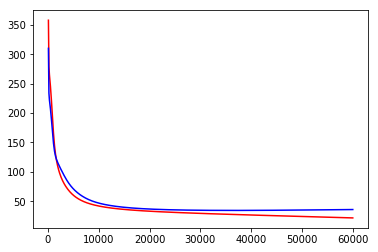

In [100]:
import torch
from torch import nn
import matplotlib.pyplot as plt

model_path = "model_no_valid.pkl"

feature_dim = X.shape[1]
dim_1 = 256
dim_2 = 128
dim_3 = 64
out_dim = 1
min_loss = 100000

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)
X_valid = torch.tensor(X_valid, dtype = torch.float32)
y_valid = torch.tensor(y_valid, dtype = torch.float32)

model = nn.Sequential(nn.Linear(feature_dim, dim_1),
                      nn.Sigmoid(),
                      nn.Linear(dim_1, dim_2),
                      nn.Sigmoid(),
                      nn.Linear(dim_2, 1)
                     
                     )

for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.xavier_uniform_(m.weight)
        print("初始化+1")

loss_func = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.0001)
#20000轮，lr=0.0001,效果很好
xx = []
yy_train_loss = []
yy_valid_loss = []

print("i\t loss\t valid_loss\t")
epochs = 60000
for i in range(1,epochs+1):
    y_hat = model(X_train)
    loss = loss_func(y_hat, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if(i%100 == 0):
        valid_loss = loss_func(model(X_valid), y_valid)
        xx.append(i)
        yy_train_loss.append(loss)
        yy_valid_loss.append(valid_loss)
        
        print("{}\t {}\t {}\t".format(i,loss,valid_loss))
        if(valid_loss<min_loss):
            min_loss = valid_loss
            torch.save(model, model_path)
        
print("over")
print("min_loss:",min_loss)
plt.plot(xx,yy_train_loss,"r", label = "train_loss")
plt.plot(xx,yy_valid_loss,"b", label = "valid_loss")

over
min_loss: tensor(34.4517, grad_fn=<MseLossBackward>)


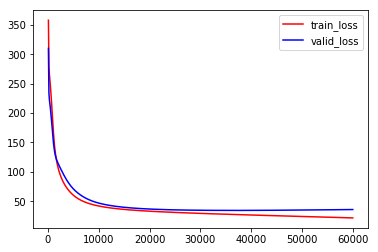

In [101]:
print("over")
print("min_loss:",min_loss)
plt.plot(xx,yy_train_loss,"r", label = "train_loss")
plt.plot(xx,yy_valid_loss,"b", label = "valid_loss")
plt.legend()

In [102]:
feature_dim

163

In [103]:
df_test = pd.read_csv(test_path,header=None, encoding = 'big5', engine = 'python')
check_is_null(df_test)
df_test

不存在缺失值


,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,21,21,20,20,19,19,19,18,17
1,id_0,CH4,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.8
2,id_0,CO,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31,0.23
3,id_0,NMHC,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29,0.1
4,id_0,NO,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1,0.9
5,id_0,NO2,17,14,13,14,18,21,8.9,9.4,5
6,id_0,NOx,18,16,14,15,20,23,10,10,5.8
7,id_0,O3,32,31,31,26,16,12,27,20,26
8,id_0,PM10,62,50,44,39,38,32,48,36,25
9,id_0,PM2.5,33,39,39,25,18,18,17,9,4


In [104]:
df_test.replace("NR",0, inplace =True)

In [105]:
df_2 = df_test.iloc[:,2:]

df_2

,2,3,4,5,6,7,8,9,10
0,21,21,20,20,19,19,19,18,17
1,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.8
2,0.39,0.36,0.36,0.4,0.53,0.55,0.34,0.31,0.23
3,0.16,0.24,0.22,0.27,0.27,0.26,0.27,0.29,0.1
4,1.3,1.3,1.3,1.3,1.4,1.6,1.2,1.1,0.9
5,17,14,13,14,18,21,8.9,9.4,5
6,18,16,14,15,20,23,10,10,5.8
7,32,31,31,26,16,12,27,20,26
8,62,50,44,39,38,32,48,36,25
9,33,39,39,25,18,18,17,9,4


In [106]:
raw_test_data = df_2.values
raw_test_data

array([['21', '21', '20', ..., '19', '18', '17'],
       ['1.7', '1.7', '1.7', ..., '1.7', '1.7', '1.8'],
       ['0.39', '0.36', '0.36', ..., '0.34', '0.31', '0.23'],
       ...,
       ['76', '99', '93', ..., '98', '97', '65'],
       ['2.2', '3.2', '2.5', ..., '5.7', '4.9', '3.6'],
       ['1.7', '2.8', '2.6', ..., '4.9', '5.2', '3.6']], dtype=object)

In [107]:
X_test = []

for i in range(240):
    index = i*18
    data_temp = raw_test_data[index:index+18, :].reshape(-1)
    X_test.append(data_temp)
    
X_test = np.array(X_test).astype(float)

if(mark_normalize):
    X_test = (X_test-mean_x)/std_x  #

tt = np.ones(240).reshape(240,1)
X_test = np.hstack((X_test, tt))
print(X_test.shape)

(240, 163)


In [108]:
X_test = torch.tensor(X_test, dtype= torch.float32)

model = torch.load(model_path)
y_test = model(X_test)
print("over")

over


In [109]:
y_test.shape

torch.Size([240, 1])

In [110]:
y_test = y_test.detach().numpy()
y_test

array([[ 7.3583183],
       [15.986061 ],
       [25.524426 ],
       [ 8.850712 ],
       [26.977694 ],
       [21.107094 ],
       [22.93929  ],
       [31.720087 ],
       [17.229568 ],
       [59.80978  ],
       [12.283632 ],
       [10.44165  ],
       [64.92338  ],
       [56.41541  ],
       [21.430317 ],
       [11.979242 ],
       [31.215033 ],
       [57.139072 ],
       [ 2.874652 ],
       [15.696033 ],
       [45.925346 ],
       [71.61843  ],
       [ 9.473797 ],
       [17.121313 ],
       [13.482361 ],
       [39.82586  ],
       [12.702955 ],
       [66.71551  ],
       [ 7.396651 ],
       [53.22057  ],
       [23.544018 ],
       [10.598441 ],
       [ 7.2256184],
       [17.134161 ],
       [29.488035 ],
       [38.12586  ],
       [48.238174 ],
       [32.47807  ],
       [41.47392  ],
       [34.79347  ],
       [ 7.4860673],
       [43.711033 ],
       [30.237865 ],
       [55.19892  ],
       [16.436922 ],
       [36.918568 ],
       [23.051928 ],
       [ 9.94

In [112]:
import csv
sumbmit_csv_path = "submit_have_valid_SGD.csv"

with open(sumbmit_csv_path, "w") as f:
    csv_writer = csv.writer(f)
    header = ['id', 'value']
    print(header)
    csv_writer.writerow(header)
    for i in range(240):
        row = ['id_' + str(i), y_test[i][0]]
        csv_writer.writerow(row)
        
        print(row)
print("over")

['id', 'value']
['id_0', 7.3583183]
['id_1', 15.986061]
['id_2', 25.524426]
['id_3', 8.850712]
['id_4', 26.977694]
['id_5', 21.107094]
['id_6', 22.93929]
['id_7', 31.720087]
['id_8', 17.229568]
['id_9', 59.80978]
['id_10', 12.283632]
['id_11', 10.44165]
['id_12', 64.92338]
['id_13', 56.41541]
['id_14', 21.430317]
['id_15', 11.979242]
['id_16', 31.215033]
['id_17', 57.139072]
['id_18', 2.874652]
['id_19', 15.696033]
['id_20', 45.925346]
['id_21', 71.61843]
['id_22', 9.473797]
['id_23', 17.121313]
['id_24', 13.482361]
['id_25', 39.82586]
['id_26', 12.702955]
['id_27', 66.71551]
['id_28', 7.396651]
['id_29', 53.22057]
['id_30', 23.544018]
['id_31', 10.598441]
['id_32', 7.2256184]
['id_33', 17.134161]
['id_34', 29.488035]
['id_35', 38.12586]
['id_36', 48.238174]
['id_37', 32.47807]
['id_38', 41.47392]
['id_39', 34.79347]
['id_40', 7.4860673]
['id_41', 43.711033]
['id_42', 30.237865]
['id_43', 55.19892]
['id_44', 16.436922]
['id_45', 36.918568]
['id_46', 23.051928]
['id_47', 9.940573]
['id_